Data from here: https://www.earthbyte.org/paleodem-resource-scotese-and-wright-2018/ -> PaleoDEM csv as a zip file from here: https://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/PaleoDEMS_long_lat_elev_csv_v2.zip

In [ ]:
import os
files = os.listdir('/content/data')

In [ ]:
files = [file.split('_') for file in files]

In [ ]:
year = list(range(0,410+1,10))

In [ ]:
matchingFiles = [file for file in files if int(file[1][:3]) in year]
matchingFiles

[['Map71', '410Ma.csv'],
 ['Map44', '210Ma.csv'],
 ['Map31', '140Ma.csv'],
 ['Map45', '220Ma.csv'],
 ['Map53.5', '280Ma.csv'],
 ['Map11', '040Ma.csv'],
 ['Map55', '290Ma.csv'],
 ['Map68', '390Ma.csv'],
 ['Map25', '110Ma.csv'],
 ['Map35', '160Ma.csv'],
 ['Map01', '000Ma.csv'],
 ['Map07', '020Ma.csv'],
 ['Map19', '080Ma.csv'],
 ['Map17', '070Ma.csv'],
 ['Map09', '030Ma.csv'],
 ['Map23', '100Ma.csv'],
 ['Map63', '340Ma.csv'],
 ['Map13', '050Ma.csv'],
 ['Map41', '190Ma.csv'],
 ['Map33', '150Ma.csv'],
 ['Map51', '260Ma.csv'],
 ['Map46', '230Ma.csv'],
 ['Map05', '010Ma.csv'],
 ['Map70', '400Ma.csv'],
 ['Map67', '380Ma.csv'],
 ['Map57', '300Ma.csv'],
 ['Map64', '350Ma.csv'],
 ['Map29', '130Ma.csv'],
 ['Map27', '120Ma.csv'],
 ['Map15', '060Ma.csv'],
 ['Map21', '090Ma.csv'],
 ['Map60', '320Ma.csv'],
 ['Map47', '240Ma.csv'],
 ['Map62', '330Ma.csv'],
 ['Map37', '170Ma.csv'],
 ['Map59', '310Ma.csv'],
 ['Map43', '200Ma.csv'],
 ['Map66', '370Ma.csv'],
 ['Map39', '180Ma.csv'],
 ['Map65', '360Ma.csv']

In [ ]:
matchingFiles.sort(key=lambda x: x[1])
matchingFiles

[['Map01', '000Ma.csv'],
 ['Map05', '010Ma.csv'],
 ['Map07', '020Ma.csv'],
 ['Map09', '030Ma.csv'],
 ['Map11', '040Ma.csv'],
 ['Map13', '050Ma.csv'],
 ['Map15', '060Ma.csv'],
 ['Map17', '070Ma.csv'],
 ['Map19', '080Ma.csv'],
 ['Map21', '090Ma.csv'],
 ['Map23', '100Ma.csv'],
 ['Map25', '110Ma.csv'],
 ['Map27', '120Ma.csv'],
 ['Map29', '130Ma.csv'],
 ['Map31', '140Ma.csv'],
 ['Map33', '150Ma.csv'],
 ['Map35', '160Ma.csv'],
 ['Map37', '170Ma.csv'],
 ['Map39', '180Ma.csv'],
 ['Map41', '190Ma.csv'],
 ['Map43', '200Ma.csv'],
 ['Map44', '210Ma.csv'],
 ['Map45', '220Ma.csv'],
 ['Map46', '230Ma.csv'],
 ['Map47', '240Ma.csv'],
 ['Map49', '250Ma.csv'],
 ['Map51', '260Ma.csv'],
 ['Map52', '270Ma.csv'],
 ['Map53.5', '280Ma.csv'],
 ['Map55', '290Ma.csv'],
 ['Map57', '300Ma.csv'],
 ['Map59', '310Ma.csv'],
 ['Map60', '320Ma.csv'],
 ['Map62', '330Ma.csv'],
 ['Map63', '340Ma.csv'],
 ['Map64', '350Ma.csv'],
 ['Map65', '360Ma.csv'],
 ['Map66', '370Ma.csv'],
 ['Map67', '380Ma.csv'],
 ['Map68', '390Ma.csv']

In [ ]:
import csv

for file in matchingFiles:
    input_file = '/content/data/' + '_'.join(file)
    output_file = '/content/renamed/' + file[1]
    try:
        with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
            reader = csv.reader(infile)
            writer = csv.writer(outfile)

            # Copy the data from the input file to the output file
            for row in reader:
                writer.writerow(row)

    except Exception as e:
        print(f"Error processing file {input_file}: {e}")


In [ ]:
!zip -r renamed.zip /content/renamed

  adding: content/renamed/ (stored 0%)
  adding: content/renamed/180Ma.csv (deflated 81%)
  adding: content/renamed/230Ma.csv (deflated 81%)
  adding: content/renamed/110Ma.csv (deflated 85%)
  adding: content/renamed/200Ma.csv (deflated 81%)
  adding: content/renamed/250Ma.csv (deflated 81%)
  adding: content/renamed/020Ma.csv (deflated 82%)
  adding: content/renamed/050Ma.csv (deflated 84%)
  adding: content/renamed/030Ma.csv (deflated 83%)
  adding: content/renamed/220Ma.csv (deflated 81%)
  adding: content/renamed/320Ma.csv (deflated 82%)
  adding: content/renamed/080Ma.csv (deflated 84%)
  adding: content/renamed/330Ma.csv (deflated 82%)
  adding: content/renamed/140Ma.csv (deflated 85%)
  adding: content/renamed/400Ma.csv (deflated 87%)
  adding: content/renamed/060Ma.csv (deflated 83%)
  adding: content/renamed/040Ma.csv (deflated 83%)
  adding: content/renamed/000Ma.csv (deflated 82%)
  adding: content/renamed/190Ma.csv (deflated 81%)
  adding: content/renamed/130Ma.csv (deflat

In [ ]:
import csv

elevations = []
for file in matchingFiles:
    input_file = '/content/data/' + '_'.join(file)
    output_file = '/content/renamed/' + file[1]
    try:
        with open(input_file, 'r') as infile:
            reader = csv.reader(infile)

            line = 0
            for row in reader:
                if line == 0:
                    line += 1
                    continue
                elevation = float(row[2])
                elevations.append(elevation)


    except Exception as e:
        print(f"Error processing file {input_file}: {e}")


In [ ]:
print(elevations[:10])

[10500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_elevation_histogram(elevations, lineBreaks=None, bins=100):
    # Create the histogram
    plt.figure(figsize=(12, 6))

    # Plot histogram with KDE curve
    counts, bins, _ = plt.hist(elevations, bins=bins, density=True, alpha=0.7)

    # Add a kernel density estimate
    kde = np.histogram(elevations, bins=bins, density=True)

    # Customize plot
    plt.title('Distribution of Elevations')
    plt.xlabel('Elevation (meters)')
    plt.ylabel('Density')

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Add summary statistics as text
    stats_text = f'Min: {min(elevations):.2f}\n'
    stats_text += f'Max: {max(elevations):.2f}\n'
    stats_text += f'Mean: {np.mean(elevations):.2f}\n'
    stats_text += f'Median: {np.median(elevations):.2f}\n'
    stats_text += f'Std Dev: {np.std(elevations):.2f}'

    # Position text box in upper right
    plt.text(0.95, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Calculate and print percentiles
    percentiles = np.percentile(elevations, [10, 25, 50, 75, 90])
    print("\nPercentiles:")
    print(f"10th: {percentiles[0]:.2f}")
    print(f"25th: {percentiles[1]:.2f}")
    print(f"50th: {percentiles[2]:.2f}")
    print(f"75th: {percentiles[3]:.2f}")
    print(f"90th: {percentiles[4]:.2f}")

    # for p in percentiles:
    #     plt.axvline(x=p, color='red', linestyle='--', alpha=0.5)

    if lineBreaks:
        for lineBreak in lineBreaks:
            plt.axvline(x=lineBreak, color='red', linestyle='--', alpha=0.5)

    plt.show()

    return percentiles


Percentiles:
10th: -4920.00
25th: -3480.00
50th: -3440.00
75th: 120.00
90th: 480.00


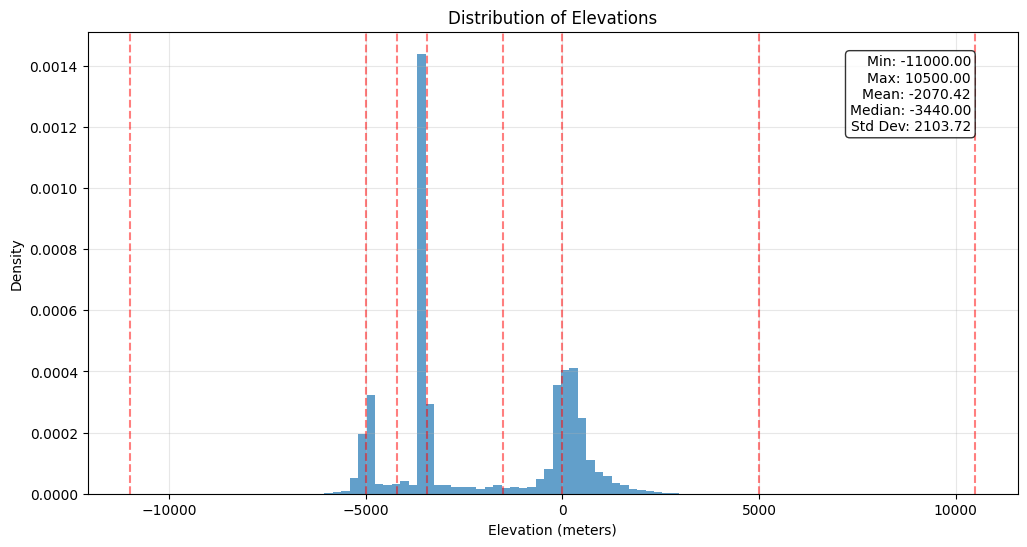

array([-4920., -3480., -3440.,   120.,   480.])

In [ ]:
plot_elevation_histogram(elevations, lineBreaks=[-11000,-5000,-4200,-3440,-1500,0,5000,10500])

In [ ]:
color_stops = {
    -11000: (0, 0, 100),    # Deepest possible (darkest blue)
    -5000: (0, 0, 255),     # Deep ocean peak (pure blue)
    -4200: (0, 100, 255),   # Transition
    -3440: (0, 191, 255),   # Continental shelf peak (light blue)
    -1500: (34, 139, 34),   # Transition (green)
    0: (205, 133, 63),      # Land peak (brown)
    5000: (139, 69, 19),    # High elevation peak (dark brown)
    10500: (100, 30, 10)    # Highest possible (darkest brown)
}
elevation_points = np.array(list(color_stops.keys()))
color_values = np.array(list(map(lambda a: [a[0],a[1],a[2]], color_stops.values())))
print(elevation_points)
print(color_values)

[-11000  -5000  -4200  -3440  -1500      0   5000  10500]
[[  0   0 100]
 [  0   0 255]
 [  0 100 255]
 [  0 191 255]
 [ 34 139  34]
 [205 133  63]
 [139  69  19]
 [100  30  10]]


In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd
from scipy.interpolate import interp1d

def process_elevation_files(directory_path, fileNames):
    # Create interpolation functions for each RGB channel
    r_interp = interp1d(elevation_points, color_values[:, 0], bounds_error=False, fill_value=(color_values[0, 0], color_values[-1, 0]))
    g_interp = interp1d(elevation_points, color_values[:, 1], bounds_error=False, fill_value=(color_values[0, 1], color_values[-1, 1]))
    b_interp = interp1d(elevation_points, color_values[:, 2], bounds_error=False, fill_value=(color_values[0, 2], color_values[-1, 2]))

    # Process each file
    processed_data = {}
    for file_path in fileNames:
        # Extract age from filename (e.g., "010Ma.csv" -> 10)
        age = int(file_path[:3])

        # Read and process the elevation data
        elevations = pd.read_csv(directory_path + file_path).values

        # Get RGB values for each elevation
        elev_values = elevations[:, 2]
        colors = np.zeros((len(elev_values), 3))
        colors[:, 0] = r_interp(elev_values)
        colors[..., 1] = g_interp(elev_values)
        colors[..., 2] = b_interp(elev_values)

        # Store both elevations and colors
        processed_data[age] = {
            'elevations': elevations,
            'colors': colors.astype(np.uint8)  # Convert to 0-255 RGB format
        }

    return processed_data

In [ ]:
renamedFileNames = [matchingFile[1] for matchingFile in matchingFiles]
print(renamedFileNames)

['000Ma.csv', '010Ma.csv', '020Ma.csv', '030Ma.csv', '040Ma.csv', '050Ma.csv', '060Ma.csv', '070Ma.csv', '080Ma.csv', '090Ma.csv', '100Ma.csv', '110Ma.csv', '120Ma.csv', '130Ma.csv', '140Ma.csv', '150Ma.csv', '160Ma.csv', '170Ma.csv', '180Ma.csv', '190Ma.csv', '200Ma.csv', '210Ma.csv', '220Ma.csv', '230Ma.csv', '240Ma.csv', '250Ma.csv', '260Ma.csv', '270Ma.csv', '280Ma.csv', '290Ma.csv', '300Ma.csv', '310Ma.csv', '320Ma.csv', '330Ma.csv', '340Ma.csv', '350Ma.csv', '360Ma.csv', '370Ma.csv', '380Ma.csv', '390Ma.csv', '400Ma.csv', '410Ma.csv']


In [ ]:
processed_data = process_elevation_files('/content/renamed/', renamedFileNames)

In [ ]:
processed_data[10]['colors']

array([[102,  32,  10],
       [  0, 162, 255],
       [  0, 162, 255],
       ...,
       [204, 132,  62],
       [204, 132,  62],
       [204, 132,  62]], dtype=uint8)

In [ ]:
import json
def save_json_files(processed_data, output_dir):
    for age, data in processed_data.items():
        elevations = data['elevations']
        colors = data['colors']

        # Create lists for JSON
        lats = elevations[:, 0].tolist()  # First column is latitude
        lngs = elevations[:, 1].tolist()  # Second column is longitude
        elevation_list = elevations[:, 2].tolist()  # Third column is elevation

        # Convert RGB colors to hex
        color_list = [f'#{c[0]:02x}{c[1]:02x}{c[2]:02x}' for c in colors]

        # Save as JSON
        output_data = {
            'lats': lats,
            'lngs': lngs,
            'elevations': elevation_list,
            'colors': color_list
        }

        with open(output_dir + f'{age}.json', 'w') as f:
            json.dump(output_data, f)

In [ ]:
save_json_files(processed_data, '/content/colors/')

In [ ]:
!zip -r colors.zip /content/colors

  adding: content/colors/ (stored 0%)
  adding: content/colors/0.json (deflated 91%)
  adding: content/colors/370.json (deflated 96%)
  adding: content/colors/80.json (deflated 94%)
  adding: content/colors/350.json (deflated 96%)
  adding: content/colors/310.json (deflated 96%)
  adding: content/colors/380.json (deflated 97%)
  adding: content/colors/340.json (deflated 97%)
  adding: content/colors/280.json (deflated 96%)
  adding: content/colors/390.json (deflated 96%)
  adding: content/colors/180.json (deflated 96%)
  adding: content/colors/290.json (deflated 96%)
  adding: content/colors/90.json (deflated 94%)
  adding: content/colors/230.json (deflated 96%)
  adding: content/colors/140.json (deflated 96%)
  adding: content/colors/250.json (deflated 96%)
  adding: content/colors/260.json (deflated 97%)
  adding: content/colors/10.json (deflated 92%)
  adding: content/colors/220.json (deflated 96%)
  adding: content/colors/360.json (deflated 97%)
  adding: content/colors/300.json (d

In [218]:
processed_data[10]['colors']

array([[102,  32,  10],
       [  0, 162, 255],
       [  0, 162, 255],
       ...,
       [204, 132,  62],
       [204, 132,  62],
       [204, 132,  62]], dtype=uint8)

In [212]:
# -180 to 181 since last element not counted
# 90*2 + 1 because -90 to -1 and 1 to 90 and 0
lats = np.array(list(range(-180, 181))*((90*2)+1))
lngs = np.array([i for i in range(90, -91,-1) for j in range(180*2+1)])

In [216]:
print(f'Lats equal: {np.all(processed_data[10]["elevations"][:, 0] == lats)}')
print(f'Lngs equal: {np.all(processed_data[10]["elevations"][:, 1] == lngs)}')

Lats equal: True
Lngs equal: True


In [236]:
import pandas as pd
import os
import json
from pathlib import Path

def categorize_elevation(elev):
    """Categorize elevation into high, medium, or low."""
    if elev <= -4200:
        return "#0000FF"
    elif elev < -1500:
        return "#ADD8E6"
    elif elev <= 1000:
        return "#06402B"
    else:
        return "#964B00"

def create_geojson_feature(lon, lat, color):
    """Create a GeoJSON feature for a point."""
    return {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat]
        },
        "properties": {
            "color": color
        }
    }

def process_file(input_file, output_file):
    """Process a single CSV file and convert to GeoJSON."""
    # Read the file
    points = []
    with open(input_file, 'r') as f:
        # Skip the header line
        next(f)

        # Process each line
        for line in f:
            # Split the line by comma
            values = line.strip().split(',')
            if len(values) >= 3:  # Ensure we have lon, lat, elev
                try:
                    lon = float(values[0])
                    lat = float(values[1])
                    elev = float(values[2])

                    # Categorize elevation
                    category = categorize_elevation(elev)

                    # Create GeoJSON feature
                    feature = create_geojson_feature(lon, lat, category)
                    points.append(feature)
                except ValueError as e:
                    print(f"Error processing line: {line.strip()}")

    # Create GeoJSON feature collection
    geojson = {
        "type": "FeatureCollection",
        "features": points
    }

    # Write to output file
    with open(output_file, 'w') as f:
        json.dump(geojson, f)


In [255]:
# Create output directory if it doesn't exist
os.makedirs('/content/color-geojson', exist_ok=True)

# Process all CSV files
input_dir = Path('/content/renamed')
output_dir = Path('/content/color-geojson')

for csv_file in sorted(input_dir.glob('*.csv')):
    # Get the output filename (keeping just the number part)
    output_file = output_dir / (str(int(csv_file.parts[-1].split('.')[0][:3])) + '.geojson')

    print(f'Processing {csv_file}...')
    process_file(csv_file, output_file)
    print(f'Created {output_file}')

Processing /content/renamed/000Ma.csv...
Created /content/color-geojson/0.geojson
Processing /content/renamed/010Ma.csv...
Created /content/color-geojson/10.geojson
Processing /content/renamed/020Ma.csv...
Created /content/color-geojson/20.geojson
Processing /content/renamed/030Ma.csv...
Created /content/color-geojson/30.geojson
Processing /content/renamed/040Ma.csv...
Created /content/color-geojson/40.geojson
Processing /content/renamed/050Ma.csv...
Created /content/color-geojson/50.geojson
Processing /content/renamed/060Ma.csv...
Created /content/color-geojson/60.geojson
Processing /content/renamed/070Ma.csv...
Created /content/color-geojson/70.geojson
Processing /content/renamed/080Ma.csv...
Created /content/color-geojson/80.geojson
Processing /content/renamed/090Ma.csv...
Created /content/color-geojson/90.geojson
Processing /content/renamed/100Ma.csv...
Created /content/color-geojson/100.geojson
Processing /content/renamed/110Ma.csv...
Created /content/color-geojson/110.geojson
Pro

In [258]:
!zip -r color-geojson.zip /content/color-geojson

  adding: content/color-geojson/ (stored 0%)
  adding: content/color-geojson/370.geojson (deflated 98%)
  adding: content/color-geojson/360.geojson (deflated 98%)
  adding: content/color-geojson/380.geojson (deflated 98%)
  adding: content/color-geojson/240.geojson (deflated 98%)
  adding: content/color-geojson/200.geojson (deflated 98%)
  adding: content/color-geojson/300.geojson (deflated 98%)
  adding: content/color-geojson/20.geojson (deflated 97%)
  adding: content/color-geojson/70.geojson (deflated 97%)
  adding: content/color-geojson/130.geojson (deflated 97%)
  adding: content/color-geojson/410.geojson (deflated 98%)
  adding: content/color-geojson/340.geojson (deflated 98%)
  adding: content/color-geojson/170.geojson (deflated 98%)
  adding: content/color-geojson/140.geojson (deflated 97%)
  adding: content/color-geojson/160.geojson (deflated 98%)
  adding: content/color-geojson/150.geojson (deflated 98%)
  adding: content/color-geojson/10.geojson (deflated 97%)
  adding: cont

In [259]:
import json

with open('/content/color-geojson/0.geojson', 'r') as f:
    geojson_data = json.load(f)

geojson_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-180.0, 90.0]},
   'properties': {'color': '#964B00'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-179.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-178.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-177.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-176.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-175.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-174.0, 90.0]},
   'properties': {'color': '#06402B'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates':

In [266]:
colorData = list(map(lambda a: [a['geometry']['coordinates'][0], a['geometry']['coordinates'][1], a['properties']['color']], geojson_data['features']))
colorData[:10]

[[-180.0, 90.0, '#964B00'],
 [-179.0, 90.0, '#06402B'],
 [-178.0, 90.0, '#06402B'],
 [-177.0, 90.0, '#06402B'],
 [-176.0, 90.0, '#06402B'],
 [-175.0, 90.0, '#06402B'],
 [-174.0, 90.0, '#06402B'],
 [-173.0, 90.0, '#06402B'],
 [-172.0, 90.0, '#06402B'],
 [-171.0, 90.0, '#06402B']]

In [279]:
from shapely.geometry import Point, mapping
from shapely.ops import unary_union
import json
from collections import defaultdict
from shapely.geometry import box

color_groups = defaultdict(list)
for p in colorData:
    square = box(p[0] - 0.5, p[1] - 0.5,
                p[0] + 0.5, p[1] + 0.5)
    color_groups[p[2]].append(square)

color_groups.keys()

dict_keys(['#964B00', '#06402B', '#ADD8E6', '#0000FF'])

In [280]:
# Combine points for each color
features = []
for color, points in color_groups.items():
    # Combine points into single geometry
    combined = unary_union(points)

    features.append({
        'type': 'Feature',
        'geometry': mapping(combined),
        'properties': {'color': color}
    })

In [286]:
def save_geojson(features):
    color_groups = defaultdict(list)
    for p in colorData:
        square = box(p[0] - 0.5, p[1] - 0.5,
                    p[0] + 0.5, p[1] + 0.5)
        color_groups[p[2]].append(square)

    features = []
    for color, points in color_groups.items():
        # Combine points into single geometry
        combined = unary_union(points)

        features.append({
            'type': 'Feature',
            'geometry': mapping(combined),
            'properties': {'color': color}
        })

    return {
        'type': 'FeatureCollection',
        'features': features
    }

In [287]:
os.makedirs('/content/elevation-geojson/', exist_ok=True)

In [289]:
from tqdm import tqdm

for t in tqdm(range(0, 410+1,10)):
    with open(f'/content/color-geojson/{t}.geojson', 'r') as f:
        geojson_data = json.load(f)

    colorData = list(map(lambda a: [a['geometry']['coordinates'][0], a['geometry']['coordinates'][1], a['properties']['color']], geojson_data['features']))
    geojson = save_geojson(colorData)

    with open(f'/content/elevation-geojson/{t}.geojson', 'w') as f:
        json.dump(geojson, f)

100%|██████████| 42/42 [05:13<00:00,  7.46s/it]


In [290]:
!zip -r elevation-geojson.zip /content/elevation-geojson

  adding: content/elevation-geojson/ (stored 0%)
  adding: content/elevation-geojson/370.geojson (deflated 85%)
  adding: content/elevation-geojson/360.geojson (deflated 85%)
  adding: content/elevation-geojson/380.geojson (deflated 85%)
  adding: content/elevation-geojson/240.geojson (deflated 85%)
  adding: content/elevation-geojson/200.geojson (deflated 85%)
  adding: content/elevation-geojson/300.geojson (deflated 85%)
  adding: content/elevation-geojson/20.geojson (deflated 86%)
  adding: content/elevation-geojson/70.geojson (deflated 86%)
  adding: content/elevation-geojson/130.geojson (deflated 85%)
  adding: content/elevation-geojson/410.geojson (deflated 85%)
  adding: content/elevation-geojson/340.geojson (deflated 85%)
  adding: content/elevation-geojson/170.geojson (deflated 85%)
  adding: content/elevation-geojson/140.geojson (deflated 85%)
  adding: content/elevation-geojson/160.geojson (deflated 85%)
  adding: content/elevation-geojson/150.geojson (deflated 85%)
  adding

In [294]:
with open('/content/elevation-geojson/0.geojson', 'r') as f:
    elevationGeojson = json.load(f)

In [298]:
for i in elevationGeojson['features']:
    print(i['geometry']['type'])
    print(i['properties']['color'])

MultiPolygon
#964B00
MultiPolygon
#06402B
MultiPolygon
#ADD8E6
MultiPolygon
#0000FF
